# date_range

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel (r'TEMPERATURE.xls','Sheet9')

df.head(5)

,Open,High,Low,Close,Volume
0,142.90,144.75,142.90,144.18,19201712
1,143.02,143.50,142.41,142.73,24128782
2,143.69,144.79,142.72,144.09,21569557
3,144.88,145.30,143.10,143.50,14277848
4,144.45,144.96,143.78,144.02,23024107


In [3]:
rng = pd.date_range(start="7/11/2016", end="6/26/2017", freq='B')     # b FOR WORKING DAY
rng

DatetimeIndex(['2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14',
               '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20',
               '2016-07-21', '2016-07-22',
               ...
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26'],
              dtype='datetime64[ns]', length=251, freq='B')

In [4]:
df.set_index(rng,inplace=True)
df.head(5)

,Open,High,Low,Close,Volume
2016-07-11,142.90,144.75,142.90,144.18,19201712
2016-07-12,143.02,143.50,142.41,142.73,24128782
2016-07-13,143.69,144.79,142.72,144.09,21569557
2016-07-14,144.88,145.30,143.10,143.50,14277848
2016-07-15,144.45,144.96,143.78,144.02,23024107


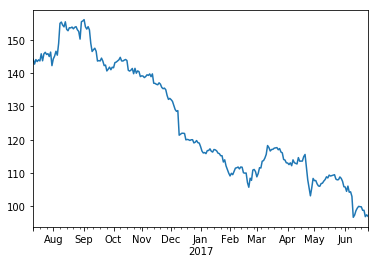

In [5]:
%matplotlib inline
df.Close.plot()

In [6]:
df.asfreq('D',method='pad')
df.head(5)

,Open,High,Low,Close,Volume
2016-07-11,142.90,144.75,142.90,144.18,19201712
2016-07-12,143.02,143.50,142.41,142.73,24128782
2016-07-13,143.69,144.79,142.72,144.09,21569557
2016-07-14,144.88,145.30,143.10,143.50,14277848
2016-07-15,144.45,144.96,143.78,144.02,23024107


In [7]:
from pandas.tseries.offsets import CustomBusinessDay

In [8]:
b= CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu')
pd.date_range(start="1/1/2019", end="6/6/2019", freq=b)


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-13', '2019-01-14',
               ...
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-06-02', '2019-06-03', '2019-06-04',
               '2019-06-05', '2019-06-06'],
              dtype='datetime64[ns]', length=113, freq='C')

In [9]:
b= CustomBusinessDay(weekmask='Sun Mon Tue Wed Thu', holidays= ["2019-01-08"])
pd.date_range(start="1/1/2019", end="6/6/2019", freq=b)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-06',
               '2019-01-07', '2019-01-09', '2019-01-10', '2019-01-13',
               '2019-01-14', '2019-01-15',
               ...
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-06-02', '2019-06-03', '2019-06-04',
               '2019-06-05', '2019-06-06'],
              dtype='datetime64[ns]', length=112, freq='C')

# to_datetime

In [10]:
dates = ['2017-01-05  2:30:00 PM','Jan 5, 2017', '01/05/2017','2017.01.05','2017-01-05']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [11]:
## US : mm/dd/yyyy      & Europe : dd/mm/yyyy

In [12]:
pd.to_datetime('5/1/2017', dayfirst=True)

Timestamp('2017-01-05 00:00:00')

In [13]:
pd.to_datetime('5#1#2017', format='%d#%M#%Y')

Timestamp('2017-01-05 00:01:00')

In [14]:
dates = ['2017-01-05  2:30:00 PM','Jan 5, 2017', '01/05/2017','2017.01.05','2017-01-05', 'abc']
pd.to_datetime(dates, errors= 'ignore')

Index(['2017-01-05  2:30:00 PM', 'Jan 5, 2017', '01/05/2017', '2017.01.05',
       '2017-01-05', 'abc'],
      dtype='object')